# Programming Exercise: Linear Regression

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

sns.set_context('notebook')
sns.set_style('white')

## Linear Regression with one varibale

In [41]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

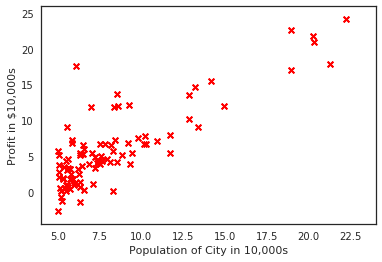

In [10]:
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Gradient Descent

In [11]:
def compute_cost(X, y, theta=[[0], [0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J

In [12]:
compute_cost(X, y)

32.072733877455676

In [17]:
def gradient_descent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = compute_cost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


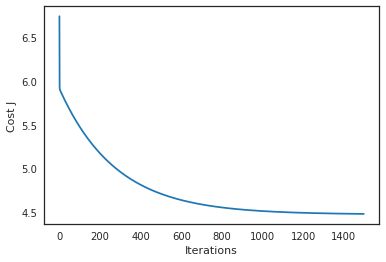

In [19]:
# theta for mini,ized cost J
theta, cost_J = gradient_descent(X, y)
print("theta: ", theta.ravel())

plt.plot(cost_J)
plt.ylabel("Cost J")
plt.xlabel("Iterations")
plt.show()

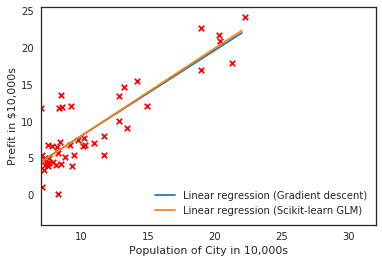

In [23]:
xx = np.arange(5, 23)
yy = theta[0] + theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

# Compare with Skitlearn Linear Regression
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1, 1), y.ravel())
plt.plot(xx, regr.intercept_ + regr.coef_ * xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(7, 32)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Prefit in $10,000s')
plt.legend(loc=4)
plt.show()

In [24]:
# Predict profit for a city with population of 35000 for 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


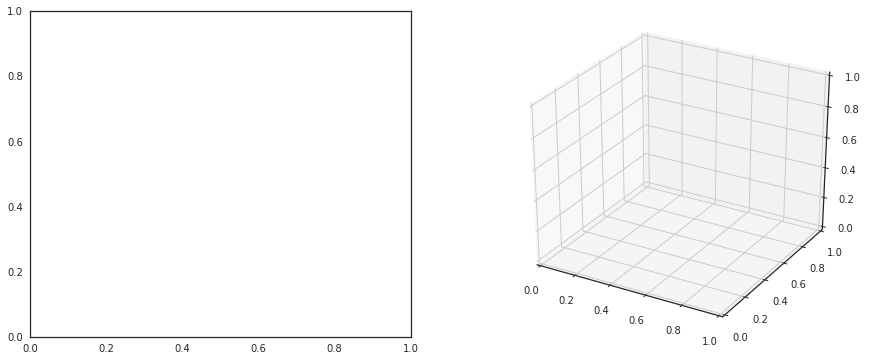

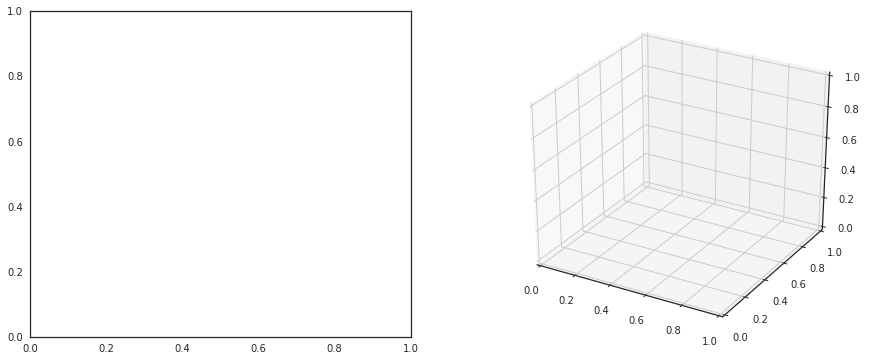

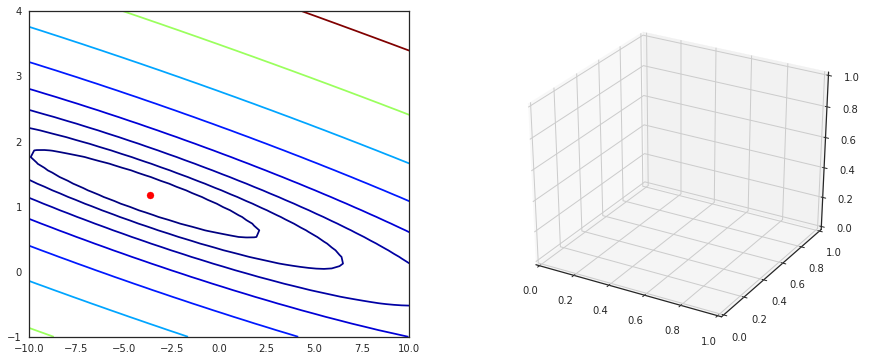

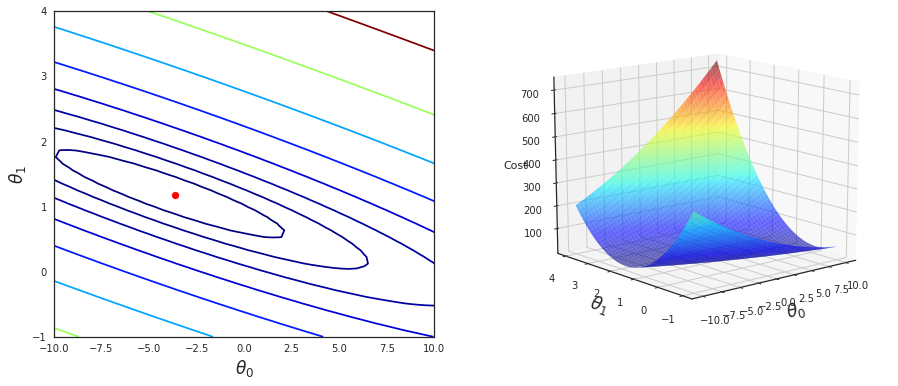

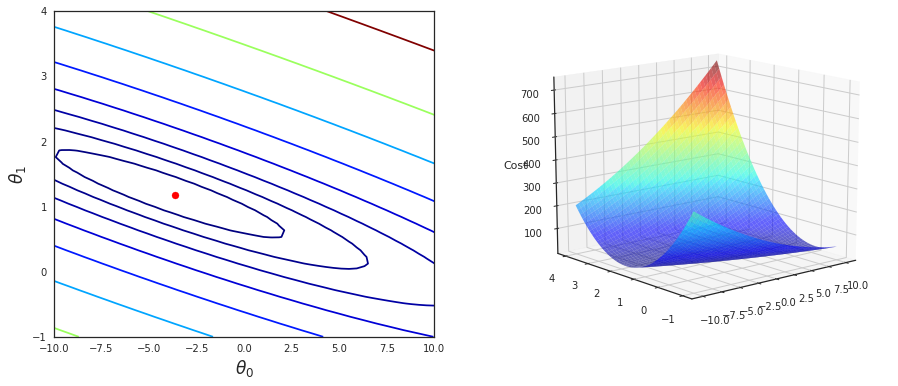

In [48]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Caculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i,j] = compute_cost(X, y, theta=[[xx[i,j]], [yy[i,j]]])
    
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
    plt.show()